## 5.5 Random Forrest: tuning parameters

Parameter tuning is a very important part of using decision tree regression and RF models, in forecasting. Both the decision tree and RF specific parameters, as mentioned in chapter 3.5, can have significant impact on the model’s accuracy, in this case it is parameters like the depth of the tree, the maximum number of features considered for splitting a node, the minimum number of data points placed in a node before the node is split, and the minimum number of data points allowed in a leaf node. These parameters help control the tradeoff between bias and variance and allows the model to capture non-linear relationships more effectively.

For the framework used in this paper, the parameter tuning is done to maintain the balance between model accuracy and computational time, has been tuned on a selected customer group and applied these optimized parameters across all customer groups. This method reduces the computational time significantly while increasing model accuracy, however with more computational resources this tuning should be done for all customer groups individually. For this thesis it has been chosen not to tune for the parameter of the number of trees used in the RF. This parameter has a very large impact on the computational time, but also model accuracy. therefore, this parameter will be tuned separately in this chapter.

In [2]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
base_path = "C:/Users/madsh/OneDrive/Dokumenter/kandidat/Fællesmappe/Forecasting-energy-consumption/Data/Results/RF/Metrics/"

ntree50_results_path  = f"{base_path}h=1_steps_ahead=720_ntree=50_RF_metrics.csv"
ntree75_results_path  = f"{base_path}h=1_steps_ahead=720_ntree=75_RF_metrics.csv"
ntree100_results_path = f"{base_path}h=1_steps_ahead=720_ntree=100_RF_metrics.csv"
ntree125_results_path = f"{base_path}h=1_steps_ahead=720_ntree=125_RF_metrics.csv"
ntree150_results_path = f"{base_path}h=1_steps_ahead=720_ntree=150_RF_metrics.csv"
ntree175_results_path = f"{base_path}h=1_steps_ahead=720_ntree=175_RF_metrics.csv"
ntree200_results_path = f"{base_path}h=1_steps_ahead=720_ntree=200_RF_metrics.csv"
ntree225_results_path = f"{base_path}h=1_steps_ahead=720_ntree=225_RF_metrics.csv"
ntree250_results_path = f"{base_path}h=1_steps_ahead=720_ntree=250_RF_metrics.csv"

ntree50_results  = pd.read_csv(ntree50_results_path)
ntree75_results  = pd.read_csv(ntree75_results_path)
ntree100_results = pd.read_csv(ntree100_results_path)
ntree125_results = pd.read_csv(ntree125_results_path)
ntree150_results = pd.read_csv(ntree150_results_path)
ntree175_results = pd.read_csv(ntree175_results_path)
ntree200_results = pd.read_csv(ntree200_results_path)
ntree225_results = pd.read_csv(ntree225_results_path) 
ntree250_results = pd.read_csv(ntree250_results_path)

C:\Users\madsh\AppData\Local\Temp\ipykernel_6024\2280490235.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['ntree value'], fontsize = 12)


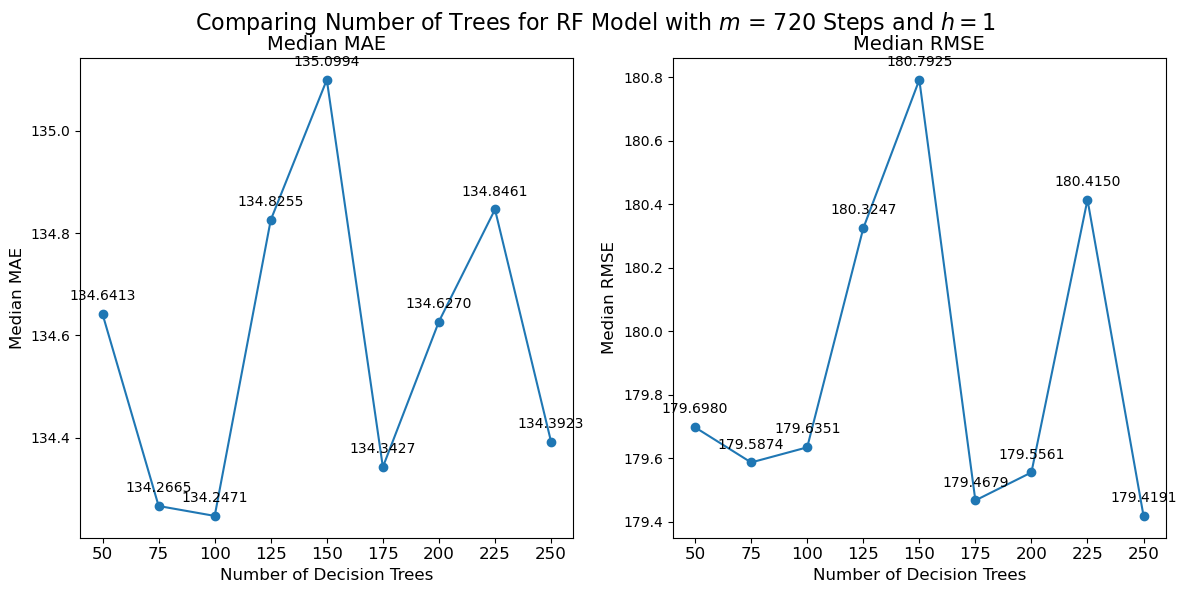

In [8]:
# Define a function to plot metrics for ntree datasets
def plot_metric(ax, metric_name):
    # Calculate median metric values for each ntree file
    median_metrics = {
        '50': ntree50_results[metric_name].median(),
        '75': ntree75_results[metric_name].median(),
        '100': ntree100_results[metric_name].median(),
        '125': ntree125_results[metric_name].median(),
        '150': ntree150_results[metric_name].median(),
        '175': ntree175_results[metric_name].median(),
        '200': ntree200_results[metric_name].median(),
        '225': ntree225_results[metric_name].median(),
        '250': ntree250_results[metric_name].median(),
    }

    # Create a DataFrame from the dictionary
    df = pd.DataFrame(list(median_metrics.items()), columns=['ntree value', metric_name])

    # Scatter and line plot
    ax.scatter(df['ntree value'], df[metric_name], color='#1f77b4')
    ax.plot(df['ntree value'], df[metric_name], color='#1f77b4')

    # Annotating each point
    for i, txt in enumerate(df[metric_name]):
        ax.annotate(f"{txt:.4f}", (df['ntree value'][i], df[metric_name][i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

    # Setting labels, title, and x-tick labels with a 45-degree rotation
    ax.set_title(f'Median {metric_name}', fontsize=14)
    ax.set_xlabel('Number of Decision Trees', fontsize=12)
    ax.set_ylabel(f'Median {metric_name}', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_xticklabels(df['ntree value'], fontsize = 12)

# Create a 1x2 subplot for MAE and RMSE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

plot_metric(ax1, 'MAE')
plot_metric(ax2, 'RMSE')

# Adjust layout and add an overall title with Mathtext
plt.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Comparing Number of Trees for RF Model with $m$ = 720 Steps and $h=1$', fontsize=16)

plt.show()

The figure above shows the performance metrics (MAE and RMSE) for nine RF models with different number of trees.

When looking at the RMSE values, starting from 50 trees, there is a decrease in RMSE, reaching its lowest point at 200 trees before starting to increase again. Suggesting that 200 trees provide the optimal balance between bias and variance.

In this case, as the number of trees increases from 50 to 200, the model’s variance is likely reduced without introducing a significant bias, thereby improving the model’s accuracy as indicated by the reduction in RMSE. Beyond 250 trees, the RMSE might begin to increase again as mentioned showing that, 250 trees are the optimal choice for the parameter reflected by the RMSE's apparent minimum at this number, as the general idea behind RF is that lots of high variance low biased trees combines to generate a low bias low variance forest.